# Solución de ecuaciones
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Búsqueda de raíces por métodos abiertos
Los métodos abiertos, a diferencia de los métodos cerrados, calculan en cada iteración una aproximación a la raíz partiendo de un valor inicial y una función auxiliar, sin necesidad de verificar lo que sucede dentro de un intervalo.

## Agenda
1. Generalidades
1. Método de punto fijo
1. Método de Newton Raphson
1. Método de la secante

In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definir e incluir nuevas funciones al cuaderno
def _buscar_intervalos(fun, ini, fin):
    """ Método para buscar intervalos en los que ocurra cambio de signo.

        ## Parámetros:
            fun (function)  : función para analizar.
            ini (int)       : inicio del análisis.
            fin (int)       : limite final del análisis.
        
        ## Devoluciones:
            I (list)        : Lista de tuplas con los intervalos donde hay un cero.
    """
    i = ini - 1 # Variable para contar iteraciones
    I = []      # Variable para almacenar los intervalos
    
    while i < fin:
        i += 1
        if fun(i) == 0:
            I.append((i, i))
        elif fun(i) * fun(i+1) < 0:
            I.append((i, i+1))
        else:
            pass
    return I

def _imprimir_paso(paso):
    Iteraciones = len(paso[0])
    Tb = f"| I # | {'Xi':>8} | {'Error Abs':>9} | {'F(Xi)':>9} |\n"
    Tb += "------------------------------------------\n" 
    for i in range(Iteraciones):
        xi = paso[0][i]
        eai = paso[1][i]
        yi = paso[2][i]
        Tb += f"| {i+1:3} | {xi:8.5f} | {eai:9.5f} | {yi:9.5f} |\n"
    
    return print(Tb)


## 1. Métodos Abiertos
---
Los métodos abiertos calculan en cada iteración una aproximación a la raíz partiendo de un valor inicial y una función auxiliar, pero no se ocupan de verificar si esta aproximación genera o no un intervalo que contenga una raíz; como consecuencia de ello en estos métodos no hay garantía de la convergencia.

La función auxiliar usada para predecir la raíz es una fórmula puede desarrollarse como la sustitución de un punto fijo en cada iteración y el valor inicial que se sustituye en la función auxiliar se conoce como semilla.

> **NOTA:** Nótese que para estos métodos no es necesario tener un intervalo, solo es necesaria la semilla, el máximo de iteraciones y la tolerancia aceptada.

## 2. Método de punto fijo
---
Es el primero y más sencillo de los métodos abiertos y se basa en la definición de un punto fijo de forma que para buscar la raíz de una ecuación $\color{#a78a4d}{f(x)=0}$, se genera una función auxiliar de punto fijo $\color{#a78a4d}{x=g(x)}$ y se calcula secuencialmente el valor $\color{#a78a4d}{x}$ de la función partiendo de la semilla $\color{#a78a4d}{x_o}$ introducida al inicio, buscando que en cada iteración el valor de $\color{#a78a4d}{x}$ se acerque al valor de la raíz; continuando hasta que se reduzca el nivel de error a un nivel aceptable, según la tolerancia; o hasta que se supere el número máximo de iteraciones.

> **PUNTO FIJO:** un punto fijo de una función $f(x)$ es un número real p tal que $p = f(p)$

<p align="center">
  <img width="400" src="img/algorithm_open_1g.png">
</p>

\begin{align}
\tag{1} f(x) &= 0 \\
\tag{2} f(x) + x &= x \\
\tag{3} g(x) &= x \\
\textsf{Generalizando (3):$\qquad\qquad$} \\
\tag{4} x_n &= g(x_{n-1}) \\
\end{align}

### Ventajas:
* En algunos casos puede converger más rápidamente que los métodos cerrados.
* Útil para entender el funcionamiento de los métodos abiertos.

### Desventajas:
* El método no siempre converge.

In [2]:
# Defino el método del punto fijo
def _fijo(Func, SemX, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            SemX (int)      : semilla de la solución.
            Imax (int)      : número máximo de iteraciones.
            Tmax (int)      : exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float)  : valor de x encontrado.
            No (int)    : iteraciones.
            ea (float)  : error absoluto final
            Li (list)   : lista de las soluciones, los errores absolutos y la tabla con la evoluvión de iteraciones.
    """
    def g(x):
        y = Func(x[0]) + x[0]
        return [y,]
    
    xo = [SemX,]
    x = []
    ea = []
    y = []
    for i in range(Imax):
        xi = g(xo)
        eai = abs((xi[0] - g(xi)[0])/xi[0])
        x.append(xi[0])
        ea.append(eai)
        y.append(Func(xi[0]))
        if eai < (10**Tmax): break
        xo = xi

    # Salida del método Xm, No, ea, [S, E, Tb]
    return i, xi, eai, [x, ea, y]


## 3. Método de Newton-Raphson
---
En matemáticas, el método de Newton-Raphson es una variante del método del punto fijo, en este caso la función auxiliar se define de tal forma que linealice la función en las cercanías del valor semilla $\color{#a78a4d}{x_o}$, y sucesivamente calcular el corte dicha recta como un nuevo valor de $\color{#a78a4d}{x}$.

<p align="center">
  <img width="400" src="img/algorithm_open_2g.png">
</p>

\begin{align}
\tag{5} y - y_o &= m (x - x_o) \\
\tag{6} f(x) - f(x_o) &= f^{\prime}(x_o)(x - x_o) \\
\tag{7} f(x) &= f^{\prime}(x_o)(x - x_o) + f(x_o) \\
\tag{8} f(x) &= f^{\prime}(x_o)(x - x_o) + f(x_o) = 0 \\
\tag{9} x &= x_o - \frac{f(x_o)}{f^{\prime}(x_o)} \\
\tag{10} x_n &= x_{n-1} - \frac{f(x_{n-1})}{f^{\prime}(x_{n-1})} \\
\end{align}

### Ventajas:
* Método muy eficiente en la mayoria de los casos.
* Se puede evitar alguna de sus desventajas definiendo un valor cercano de la raíz.

### Desventajas:
* El método no siempre converge.
* para evitar puntos criticos en la cercania de la solución.
* Raices múltiples
* Múltiples puntos de inflexión
* Pendientes prolongadas alrededor de la raíz.



In [3]:
# Defino el método Newton-Raphson
def _newton(Func, DevX, SemX, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            DevX (function) : derivada de la funcion.
            SemX (int)      : semilla de la solución.
            Imax (int)      : número máximo de iteraciones.
            Tmax (int)      : exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float)      : valor de x encontrado.
            No (int)        : iteraciones.
            ea (float)      : error absoluto final
            Li (list)       : lista de las soluciones, los errores absolutos y la tabla con la evoluvión de iteraciones.
    """
    def g(x):
        y = x[0] - Func(x[0])/DevX(x[0])
        return [y,]
    
    xo = [SemX,]
    x = []
    ea = []
    y = []
    for i in range(Imax):
        xi = g(xo)
        eai = abs((xi[0] - g(xi)[0])/xi[0])
        x.append(xi[0])
        ea.append(eai)
        y.append(Func(xi[0]))
        if eai < (10**Tmax): break
        xo = xi

    # Salida del método Xm, No, ea, [S, E, Tb]
    return i, xi, eai, [x, ea, y]

## 4. Metodo de la Secante
---
Un La recta secante es una recta que corta a una circunferencia en dos puntos. Conforme estos puntos de corte se acercan, dicha recta se aproxima a un punto y, cuando solo existe un punto que toca la circunferencia, se le llama tangente.

caso particular de las ecuaciones algebraicas sucede cuando solo los dos primeros coeficientes son distintos de cero y la solucion para x es unica y trivial.

<p align="center">
  <img width="400" src="img/algorithm_open_3g.png">
</p>

\begin{align}
\tag{11} y - y_o &= m (x - x_o) \\
\tag{12} f(x) - f(x_o) &= f^{\prime}(x_o)(x - x_o) \\
\tag{13} f(x) - f(x_o) &= \frac{f(x_o)-f(x_1)}{x_o-x_1} (x - x_o) \\
\tag{14} f(x) &= \frac{f(x_o)-f(x_1)}{x_o-x_1} (x - x_o) + f(x_o) = 0 \\
\tag{15} x &= x_o - f(x_o) \frac{ x_o-x_1 }{ f(x_o)-f(x_1) }\\
\tag{15} x_n &= x_{n-1} - f(x_{n-1}) \frac{ x_{n-1}-x_{n-2} }{ f(x_{n-1})-f(x_{n-2}) }\\
\end{align}

### Ventajas:
* Muy eficiente cuando la ecuación no posee múltiples puntos de inflexión o pendientes prolongadas alrededor de la raíz.
* Útil como aproximación inicial de otros métodos.

### Desventajas:
* El método no siempre converge.
* Es útil definir un valor cercano de la raíz, para evitar puntos criticos en la cercania de la solución.

In [4]:
# Defino el método iterativo de la Secante
def _secante(Func, Sem1, Sem2, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            Sem1 (int)      : semilla uno de la solución.
            Sem2 (int)      : semilla dos de la solución.
            Imax (int)      : número máximo de iteraciones.
            Tmax (int)      : exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float)      : valor de x encontrado.
            No (int)        : iteraciones.
            ea (float)      : error absoluto final
            Li (list)       : lista de las soluciones, los errores absolutos y la tabla con la evoluvión de iteraciones.
    """
    def g(xo):
        y1 = xo[0] - Func(xo[0])*(xo[0] - xo[1])/(Func(xo[0])-Func(xo[1]))
        y = [y1, xo[1]]
        return y
    
    xo = [Sem1, Sem2]
    x = []
    ea = []
    y = []
    for i in range(Imax):
        xi = g(xo)
        eai = abs((xi[0] - g(xi)[0])/xi[0])
        x.append(xi[0])
        ea.append(eai)
        y.append(Func(xi[0]))
        if eai < (10**Tmax): break
        xo = xi

    # Salida del método Xm, No, ea, [S, E, Tb]
    return i, xi, eai, [x, ea, y]

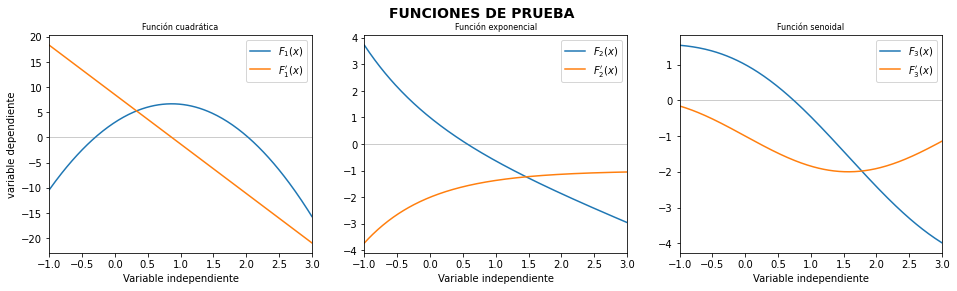

In [5]:
# Ecuación de la altura para el movimiento parabólico
def altura(θ, Vo, ho, t):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    y = -(1/2) * g * t**2 + Voy * t + ho
    return y

# Funciónes de prueba
F1 = lambda t: altura(45, 12, 3, t) 
F2 = lambda x: np.e**(-x) - x
F3 = lambda x: np.cos(x) - x

# Derivadas de las funciónes de prueba
D1 = lambda t: -9.8179 * t + 12 * np.sin(45*np.pi/180)
D2 = lambda x: -np.e**(-x) - 1
D3 = lambda x: -np.sin(x) - 1

# Vectores de prueba
t = np.linspace(-1, 3, 256, endpoint=True)
x = np.linspace(-1, 3, 256, endpoint=True)

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Funciones de Prueba'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(t, F1(t), label="$F_1(x)$")
ax[0].plot(t, D1(t), label="$F_1^{\prime}(x)$")
ax[0].set_xlim([-1, 3])
ax[0].set_title("Función cuadrática", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1, color="#ccc")
ax[1].plot(x, F2(x), label="$F_2(x)$")
ax[1].plot(x, D2(x), label="$F_2^{\prime}(x)$")
ax[1].set_xlim([-1, 3])
ax[1].set_title("Función exponencial", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1, color="#ccc")
ax[2].plot(x, F3(x), label="$F_3(x)$")
ax[2].plot(x, D3(x), label="$F_3^{\prime}(x)$")
ax[2].set_xlim([-1, 3])
ax[2].set_title("Función senoidal", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()


In [6]:
# Métodos abiertos
n1, x1, ea1, paso1  =   _fijo(F2, 0.7, 20, -4)
n2, x2, ea2, paso2  = _newton(F2, D3, 0.7, 20, -4)
n3, x3, ea3, paso3  = _secante(F2, 0, 1, 20, -4)

In [7]:
_imprimir_paso(paso1)

| I # |       Xi | Error Abs |     F(Xi) |
------------------------------------------
|   1 |  0.49659 |   0.22558 |   0.11202 |
|   2 |  0.60861 |   0.10597 |  -0.06450 |
|   3 |  0.54411 |   0.06662 |   0.03625 |
|   4 |  0.58036 |   0.03560 |  -0.02066 |
|   5 |  0.55970 |   0.02088 |   0.01168 |
|   6 |  0.57138 |   0.01162 |  -0.00664 |
|   7 |  0.56474 |   0.00666 |   0.00376 |
|   8 |  0.56851 |   0.00375 |  -0.00213 |
|   9 |  0.56637 |   0.00214 |   0.00121 |
|  10 |  0.56758 |   0.00121 |  -0.00069 |
|  11 |  0.56689 |   0.00069 |   0.00039 |
|  12 |  0.56728 |   0.00039 |  -0.00022 |
|  13 |  0.56706 |   0.00022 |   0.00013 |
|  14 |  0.56719 |   0.00013 |  -0.00007 |
|  15 |  0.56712 |   0.00007 |   0.00004 |



In [8]:
_imprimir_paso(paso2)

| I # |       Xi | Error Abs |     F(Xi) |
------------------------------------------
|   1 |  0.57628 |   0.01606 |  -0.01430 |
|   2 |  0.56703 |   0.00021 |   0.00018 |
|   3 |  0.56715 |   0.00000 |  -0.00000 |



In [9]:
_imprimir_paso(paso3)

| I # |       Xi | Error Abs |     F(Xi) |
------------------------------------------
|   1 |  0.61270 |   0.07975 |  -0.07081 |
|   2 |  0.56384 |   0.00629 |   0.00518 |
|   3 |  0.56739 |   0.00046 |  -0.00038 |
|   4 |  0.56713 |   0.00003 |   0.00003 |



---
## Mas Recursos

- [Búsqueda de raíces](https://es.wikipedia.org/wiki/Resoluci%C3%B3n_num%C3%A9rica_de_ecuaciones_no_lineales) (Wikipedia)
- [Método del punto fijo](https://es.wikipedia.org/wiki/M%C3%A9todo_del_punto_fijo) (Wikipedia)
- [Método de Newton](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton) (Wikipedia)
- [Método de la secante](https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_secante) (Wikipedia)
